In [1]:
import pandas as pd
Data1 = pd.read_csv("/content/drive/MyDrive/attention dataset/sentiment labelled sentences/amazon_cells_labelled.txt",sep = "\t", names = ['Sentences','sentiment'])
Data2 = pd.read_csv("/content/drive/MyDrive/attention dataset/sentiment labelled sentences/yelp_labelled.txt",sep = "\t", names = ['Sentences','sentiment'])

In [2]:
Data =  pd.concat([Data1, Data2])

In [3]:
Data.head()

,Sentences,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [4]:
Data.shape

(2000, 2)

In [55]:
Dependent = Data['sentiment']

In [5]:
Data['Sentences'] = Data['Sentences'].str.replace('\d+', '')

In [6]:
corpus=[]
for i in Data.Sentences:
  corpus.append(i)

In [7]:
len(corpus)

2000

In [8]:
import re
def clean_text(text):
    text = text.lower()
    
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"'bout", "about", text)
    text = re.sub(r"'til", "until", text)
    text = re.sub(r"  ","",text)
    text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", text)
    text = re.sub(r"[\([{})\]]", "", text)
    text = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text)
    text = re.sub("[^a-zA-Z0-9]+", " ", text)

    return text

clean_corpus = []
for i in corpus:
    clean_corpus.append(clean_text(i))

In [9]:
clean_corpus

['so there is no way for me to plug it in here in the us unless i go by a converter',
 'good case excellent value',
 'great for the jawbone',
 'tied to charger for conversations lasting more thanminutesmajor problems',
 'the mic is great',
 'i have to jiggle the plug to get it to line up right to get decent volume',
 'if you have several dozen or several hundred contacts then imagine the fun of sending each of them one by one',
 'if you are razr owneryou must have this',
 'needless to say i wasted my money',
 'what a waste of money and time',
 'and the sound quality is great',
 'he was very impressed when going from the original battery to the extended battery',
 'if the two were seperated by a mere ft i started to notice excessive static and garbled sound from the headset',
 'very good quality though',
 'the design is very odd as the ear clip is not very comfortable at all',
 'highly recommend for any one who has a blue tooth phone',
 'i advise everyone do not be fooled',
 'so far so 

In [72]:
#Get the count of words from filtered questions and answers  
vocab = {}

for question in clean_corpus:
    for words in question.split():
        if words not in vocab:
            vocab[words] = 1
        else:
            vocab[words] +=1

In [73]:
#total number of words appear more than 2 times
vocabs_to_index = {}
threshold = 1
i = 0
for word, count in vocab.items():
    if count >= threshold:
        vocabs_to_index[word] = i
        i += 1

In [77]:
voc_size=len(vocabs_to_index)
voc_size

3288

In [78]:
from keras.preprocessing.sequence import pad_sequences               
from keras.preprocessing.text import one_hot   
voc_size = voc_size
onehot_repr=[one_hot(words,voc_size)for words in clean_corpus] 
onehot_repr

[[3087,
  1631,
  2642,
  2192,
  1755,
  34,
  429,
  1961,
  1942,
  2214,
  746,
  180,
  746,
  1545,
  605,
  604,
  2846,
  129,
  2688,
  3233,
  801],
 [2123, 1312, 2981, 1368],
 [3180, 34, 1545, 1959],
 [926, 1961, 3238, 34, 698, 758, 3179, 2679, 2156],
 [1545, 2720, 2642, 3180],
 [2846,
  1053,
  1961,
  126,
  1545,
  1942,
  1961,
  1013,
  2214,
  1961,
  90,
  2914,
  1428,
  1961,
  1013,
  1148,
  1638],
 [2326,
  2610,
  1053,
  1037,
  1492,
  1902,
  1037,
  2901,
  2931,
  451,
  2065,
  1545,
  2003,
  64,
  3185,
  2975,
  64,
  106,
  2662,
  2688,
  2662],
 [2326, 2610, 2287, 1463, 676, 2676, 1053, 2382],
 [2340, 1961, 70, 2846, 555, 237, 1376],
 [1710, 3233, 382, 64, 1376, 1920, 198],
 [1920, 1545, 1859, 1164, 2642, 3180],
 [820,
  2731,
  2671,
  2538,
  1211,
  84,
  1305,
  1545,
  1656,
  3104,
  1961,
  1545,
  781,
  3104],
 [2326,
  1545,
  1666,
  2463,
  2191,
  2688,
  3233,
  1276,
  586,
  2846,
  276,
  1961,
  965,
  1997,
  1926,
  1920,
  239,
 

In [79]:
# Manifest Embedding document:
sent_length=32
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=sent_length)
print(embedded_docs)                                      

[[3087 1631 2642 ...    0    0    0]
 [2123 1312 2981 ...    0    0    0]
 [3180   34 1545 ...    0    0    0]
 ...
 [ 807 2846 2731 ...    0    0    0]
 [1545  559  484 ...    0    0    0]
 [ 451  869 2326 ...    0    0    0]]


In [91]:
#Creating LSTM-RNN model
import keras
from keras.layers import Embedding                                   # embedding layer
from keras.models import Sequential
from keras.layers import LSTM                                        # LSTM layer
from keras.layers import Dense
embedding_vector_features=32                                                               # features 
model=Sequential()                                                                          # Sequential model
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))         #Embedding layer due to word embedding techniques adopted # input layer
model.add(LSTM(100,dropout=0.3))                                                                        # LSTM(neurons=100)
model.add(Dense(1,activation='sigmoid'))                                                    #output layer
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])             # compile the model
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 32, 32)            105216    
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 158,517
Trainable params: 158,517
Non-trainable params: 0
_________________________________________________________________
None


In [92]:
import numpy as np
X = np.array(embedded_docs)
y = np.array(Dependent)
print(X.shape,y.shape)

(2000, 32) (2000,)


In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [100]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
24/24 [==============================] - 1s 45ms/step - loss: 0.2291 - accuracy: 0.9407 - val_loss: 0.2073 - val_accuracy: 0.9400
Epoch 2/10
24/24 [==============================] - 1s 44ms/step - loss: 0.1364 - accuracy: 0.9633 - val_loss: 0.1707 - val_accuracy: 0.9320
Epoch 3/10
24/24 [==============================] - 1s 44ms/step - loss: 0.1055 - accuracy: 0.9760 - val_loss: 0.2113 - val_accuracy: 0.9300
Epoch 4/10
24/24 [==============================] - 1s 44ms/step - loss: 0.0897 - accuracy: 0.9800 - val_loss: 0.2286 - val_accuracy: 0.9360
Epoch 5/10
24/24 [==============================] - 1s 43ms/step - loss: 0.0750 - accuracy: 0.9847 - val_loss: 0.2172 - val_accuracy: 0.9460
Epoch 6/10
24/24 [==============================] - 1s 43ms/step - loss: 0.0677 - accuracy: 0.9840 - val_loss: 0.2399 - val_accuracy: 0.9400
Epoch 7/10
24/24 [==============================] - 1s 43ms/step - loss: 0.0611 - accuracy: 0.9873 - val_loss: 0.2154 - val_accuracy: 0.9360
Epoch 8/10
24

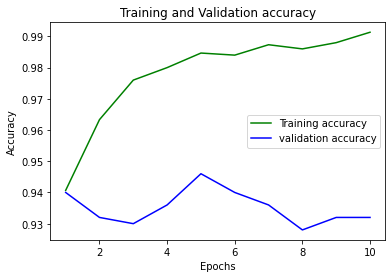

In [101]:
#Diagnose curve plot : 1 : Accuracy Vs Validation Accuracy
import matplotlib.pyplot as plt
loss_train = model.history.history['accuracy']
loss_val = model.history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

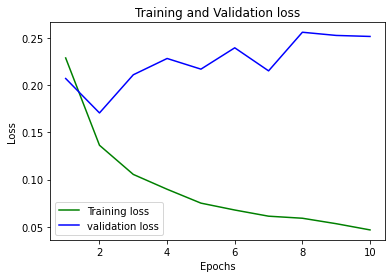

In [102]:
# Diagnose curve plot :2 : loss Vs Validation loss
loss_train = model.history.history['loss']
loss_val = model.history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()